In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns
import math
import os

In [5]:
files = os.listdir("../data/newer5_windup_attempt")
data = []
diff_means = []
for file in files:
    data_in = pd.read_csv(f"../data/newer5_windup_attempt/{file}")
    # mean = data_in.query("fw != -1")['diff'].mean()
    # if not math.isnan(mean):
    #     diff_means.append(mean)
    data.append(data_in)
data = pd.concat(data)
data


,Unnamed: 0,id,framework,complexity,framework_complexity,program,fw_running,program_fwrunning,ete,fw,diff
0,0,0.0,DirectX11,default,DirectX11_default,windup,False,windup_False,8516.0,-1.0,8517.0
1,1,1.0,DirectX11,default,DirectX11_default,windup,False,windup_False,8064.0,-1.0,8065.0
2,2,2.0,DirectX11,default,DirectX11_default,windup,False,windup_False,7616.0,-1.0,7617.0
3,3,3.0,DirectX11,default,DirectX11_default,windup,False,windup_False,9524.0,-1.0,9525.0
4,4,4.0,DirectX11,default,DirectX11_default,windup,False,windup_False,8396.0,-1.0,8397.0
...,...,...,...,...,...,...,...,...,...,...,...
195,195,195.0,wxpython,rects,wxpython_rects,windup,True,windup_True,54796.0,48812.0,5984.0
196,196,196.0,wxpython,rects,wxpython_rects,windup,True,windup_True,52872.0,47405.0,5467.0
197,197,197.0,wxpython,rects,wxpython_rects,windup,True,windup_True,53204.0,50048.0,3156.0
198,198,198.0,wxpython,rects,wxpython_rects,windup,True,windup_True,53784.0,48575.0,5209.0


# E2E Latency

C:\Users\tina\AppData\Local\Temp\ipykernel_8704\2361163194.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[0], data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
C:\Users\tina\AppData\Local\Temp\ipykernel_8704\2361163194.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[1], data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


Text(0.5, 1.0, 'rects')

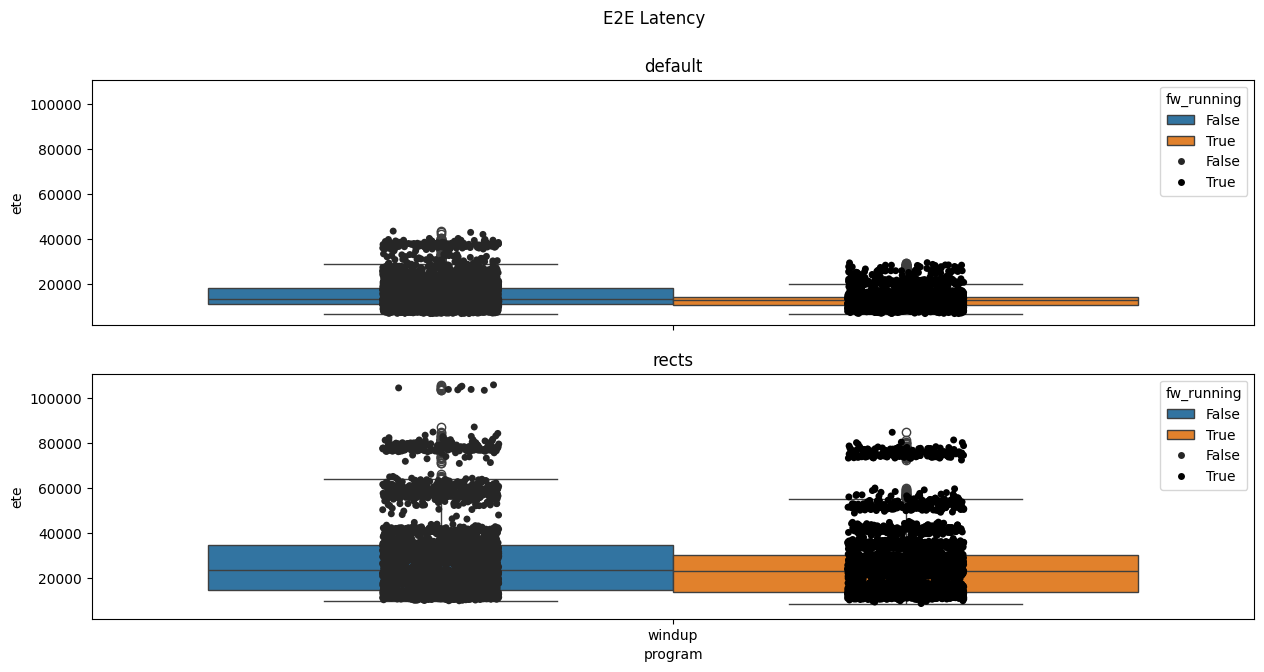

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(15, 7), sharex=True, sharey=True)
fig.suptitle("E2E Latency")

sns.boxplot(ax=axes[0], data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running')
sns.stripplot(ax=axes[0], data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
axes[0].set_title("default")

sns.boxplot(ax=axes[1], data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running')
sns.stripplot(ax=axes[1], data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
axes[1].set_title("rects")

In [7]:
data_fw_running = data[data['fw_running'] == True]

C:\Users\tina\AppData\Local\Temp\ipykernel_8704\1866071989.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='ete', hue='program', dodge=True, color='black')
C:\Users\tina\AppData\Local\Temp\ipykernel_8704\1866071989.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='ete', hue='program', dodge=True, color='black')
C:\Users\tina\AppData\Local\Temp\ipykernel_8704\1866071989.py:14: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.stripplot(ax=axes[2], dat

[Text(0, 0, 'DirectX11'),
 Text(1, 0, 'FLTK'),
 Text(2, 0, 'GLEW'),
 Text(3, 0, 'GLUT'),
 Text(4, 0, 'GTK'),
 Text(5, 0, 'Java2D'),
 Text(6, 0, 'JavaSwing'),
 Text(7, 0, 'pygame'),
 Text(8, 0, 'pyglet'),
 Text(9, 0, 'pyqt5'),
 Text(10, 0, 'pyqt6'),
 Text(11, 0, 'Qt5'),
 Text(12, 0, 'Qt6'),
 Text(13, 0, 'SDL2_Direct3D'),
 Text(14, 0, 'SDL2_OpenGLES2'),
 Text(15, 0, 'SDL2_OpenGLES'),
 Text(16, 0, 'SDL2_OpenGL'),
 Text(17, 0, 'SDL2_Software'),
 Text(18, 0, 'tkinter'),
 Text(19, 0, 'win32'),
 Text(20, 0, 'wxpython')]

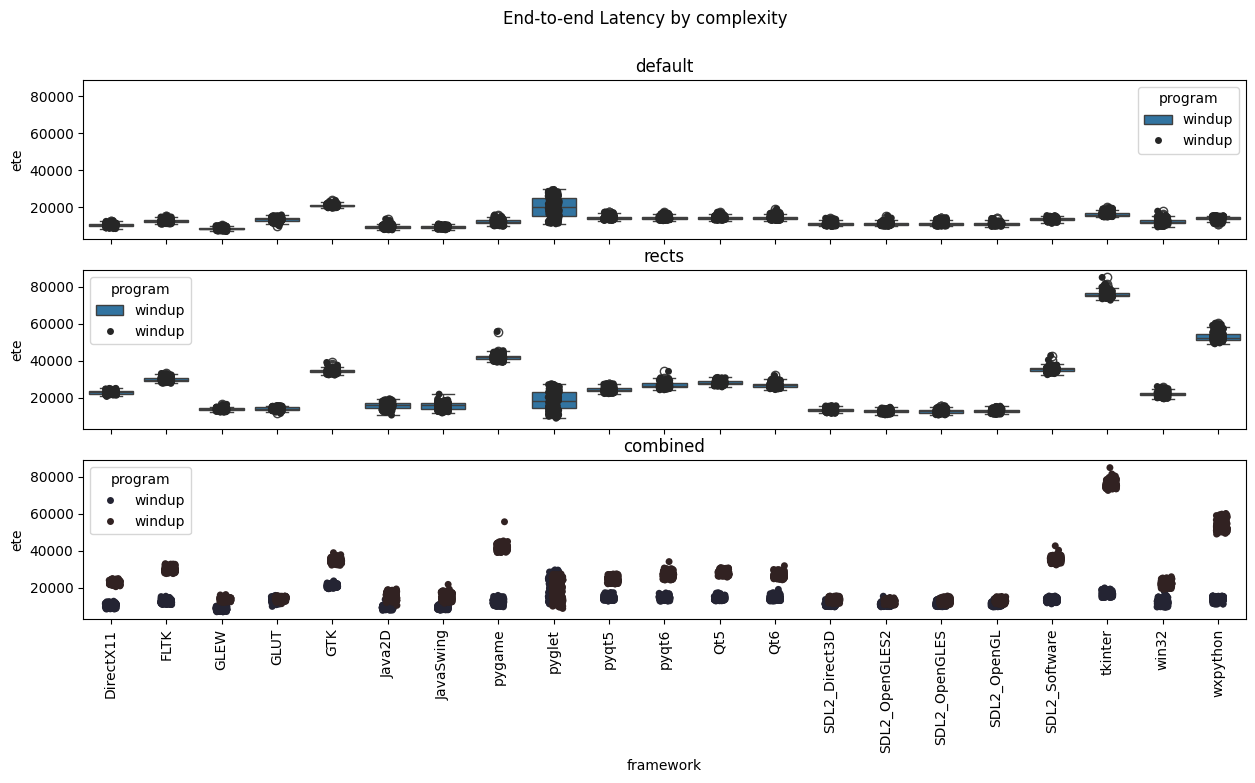

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(15, 7), sharex=True, sharey=True)
fig.suptitle(f"End-to-end Latency by complexity")

sns.boxplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='ete', hue='program', dodge=True)
sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='ete', hue='program', dodge=True, color='black')
axes[0].set_title("default")

sns.boxplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='ete', hue='program', dodge=True)
sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='ete', hue='program', dodge=True, color='black')
axes[1].set_title("rects")

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='ete', hue='program', dodge=True, color='blue')
sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='ete', hue='program', dodge=True, color='red', transform=offset(0.05)+trans)
axes[2].set_title("combined")

axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

# Framework Latency

In [9]:
data_fw_running = data[data['fw_running'] == True]

In [10]:
# sns.set(rc={'figure.figsize':(15, 5)})
# sns.boxplot(data=data_fw_running, x='framework_complexity', y='fw', hue='program', dodge=True).set_title("Framework Latency")
# plot = sns.stripplot(data=data_fw_running, x='framework_complexity', y='fw', hue='program', dodge=True, color='black')

# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [11]:
# READER = 'getpixel'
# sns.set(rc={'figure.figsize':(15, 5)})
# sns.boxplot(data=data_fw_running[data_fw_running['program'] == READER], x='framework', y='fw', hue='complexity', dodge=True).set_title(f"Framework Latency for {READER}")
# plot = sns.stripplot(data=data_fw_running[data_fw_running['program'] == READER], x='framework', y='fw', hue='complexity', dodge=True, color='black')
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

C:\Users\tina\AppData\Local\Temp\ipykernel_8704\3396510371.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='fw', hue='program', dodge=True, color='black')
C:\Users\tina\AppData\Local\Temp\ipykernel_8704\3396510371.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='fw', hue='program', dodge=True, color='black')
C:\Users\tina\AppData\Local\Temp\ipykernel_8704\3396510371.py:14: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.stripplot(ax=axes[2], data=

[Text(0, 0, 'DirectX11'),
 Text(1, 0, 'FLTK'),
 Text(2, 0, 'GLEW'),
 Text(3, 0, 'GLUT'),
 Text(4, 0, 'GTK'),
 Text(5, 0, 'Java2D'),
 Text(6, 0, 'JavaSwing'),
 Text(7, 0, 'pygame'),
 Text(8, 0, 'pyglet'),
 Text(9, 0, 'pyqt5'),
 Text(10, 0, 'pyqt6'),
 Text(11, 0, 'Qt5'),
 Text(12, 0, 'Qt6'),
 Text(13, 0, 'SDL2_Direct3D'),
 Text(14, 0, 'SDL2_OpenGLES2'),
 Text(15, 0, 'SDL2_OpenGLES'),
 Text(16, 0, 'SDL2_OpenGL'),
 Text(17, 0, 'SDL2_Software'),
 Text(18, 0, 'tkinter'),
 Text(19, 0, 'win32'),
 Text(20, 0, 'wxpython')]

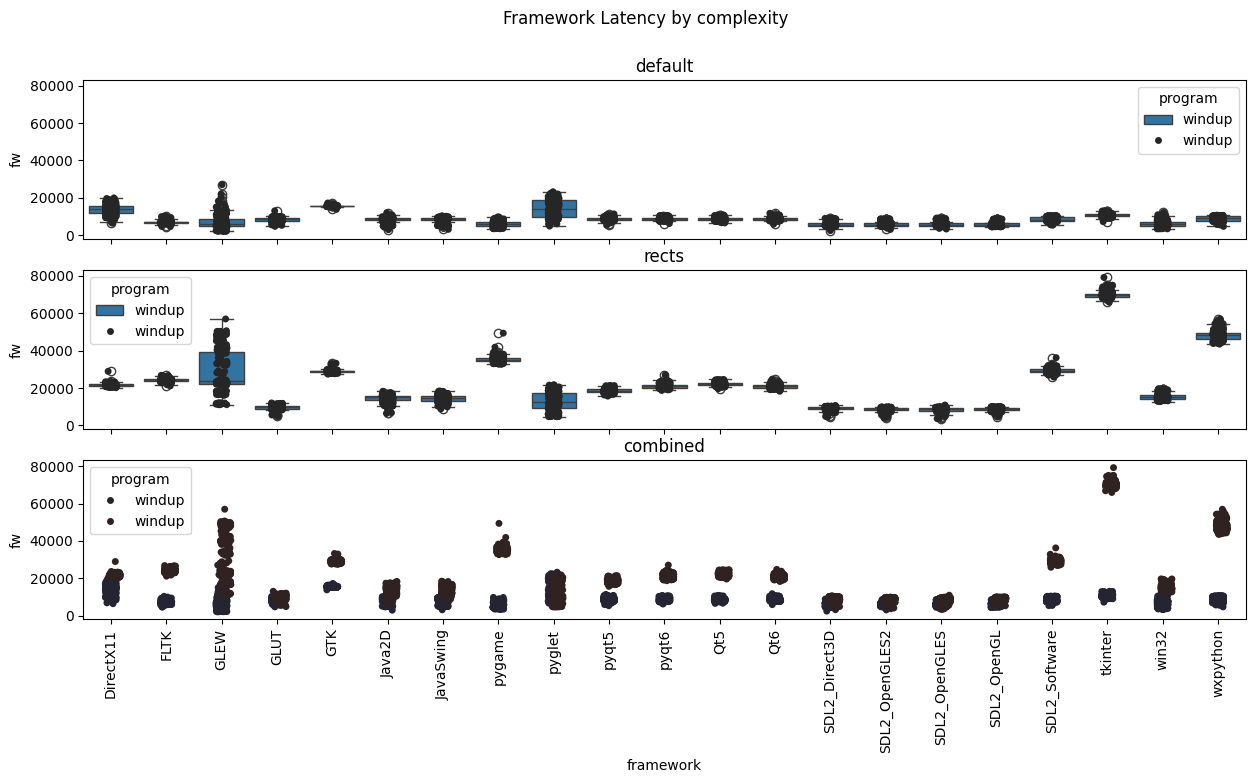

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(15, 7), sharex=True, sharey=True)
fig.suptitle(f"Framework Latency by complexity")

sns.boxplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='fw', hue='program', dodge=True)
sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='fw', hue='program', dodge=True, color='black')
axes[0].set_title("default")

sns.boxplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='fw', hue='program', dodge=True)
sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='fw', hue='program', dodge=True, color='black')
axes[1].set_title("rects")

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='fw', hue='program', dodge=True, color='blue')
sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='fw', hue='program', dodge=True, color='red', transform=offset(0.05)+trans)
axes[2].set_title("combined")

axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)


In [13]:
# FRAMEWORK = 'SDL2_OPENGL'
# fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
# fig.suptitle(f"Framework Latency for {FRAMEWORK}")

# sns.boxplot(ax=axes[0], data=data_fw_running[((data_fw_running['complexity'] == 'default') & (data_fw_running['framework'] == FRAMEWORK))], x='framework', y='fw', hue='program', dodge=True)
# sns.stripplot(ax=axes[0], data=data_fw_running[((data_fw_running['complexity'] == 'default') & (data_fw_running['framework'] == FRAMEWORK))], x='framework', y='fw', hue='program', dodge=True, color='black')
# axes[0].set_title("default")

# sns.boxplot(ax=axes[1], data=data_fw_running[((data_fw_running['complexity'] == 'rects') & (data_fw_running['framework'] == FRAMEWORK))], x='framework', y='fw', hue='program', dodge=True)
# sns.stripplot(ax=axes[1], data=data_fw_running[((data_fw_running['complexity'] == 'rects') & (data_fw_running['framework'] == FRAMEWORK))], x='framework', y='fw', hue='program', dodge=True, color='black')
# axes[1].set_title("rects")

# Difference

C:\Users\tina\AppData\Local\Temp\ipykernel_8704\2842308188.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='diff', hue='program', dodge=True, color='black')
C:\Users\tina\AppData\Local\Temp\ipykernel_8704\2842308188.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', dodge=True, color='black')
C:\Users\tina\AppData\Local\Temp\ipykernel_8704\2842308188.py:14: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.stripplot(ax=axes[2], d

[Text(0, 0, 'DirectX11'),
 Text(1, 0, 'FLTK'),
 Text(2, 0, 'GLEW'),
 Text(3, 0, 'GLUT'),
 Text(4, 0, 'GTK'),
 Text(5, 0, 'Java2D'),
 Text(6, 0, 'JavaSwing'),
 Text(7, 0, 'pygame'),
 Text(8, 0, 'pyglet'),
 Text(9, 0, 'pyqt5'),
 Text(10, 0, 'pyqt6'),
 Text(11, 0, 'Qt5'),
 Text(12, 0, 'Qt6'),
 Text(13, 0, 'SDL2_Direct3D'),
 Text(14, 0, 'SDL2_OpenGLES2'),
 Text(15, 0, 'SDL2_OpenGLES'),
 Text(16, 0, 'SDL2_OpenGL'),
 Text(17, 0, 'SDL2_Software'),
 Text(18, 0, 'tkinter'),
 Text(19, 0, 'win32'),
 Text(20, 0, 'wxpython')]

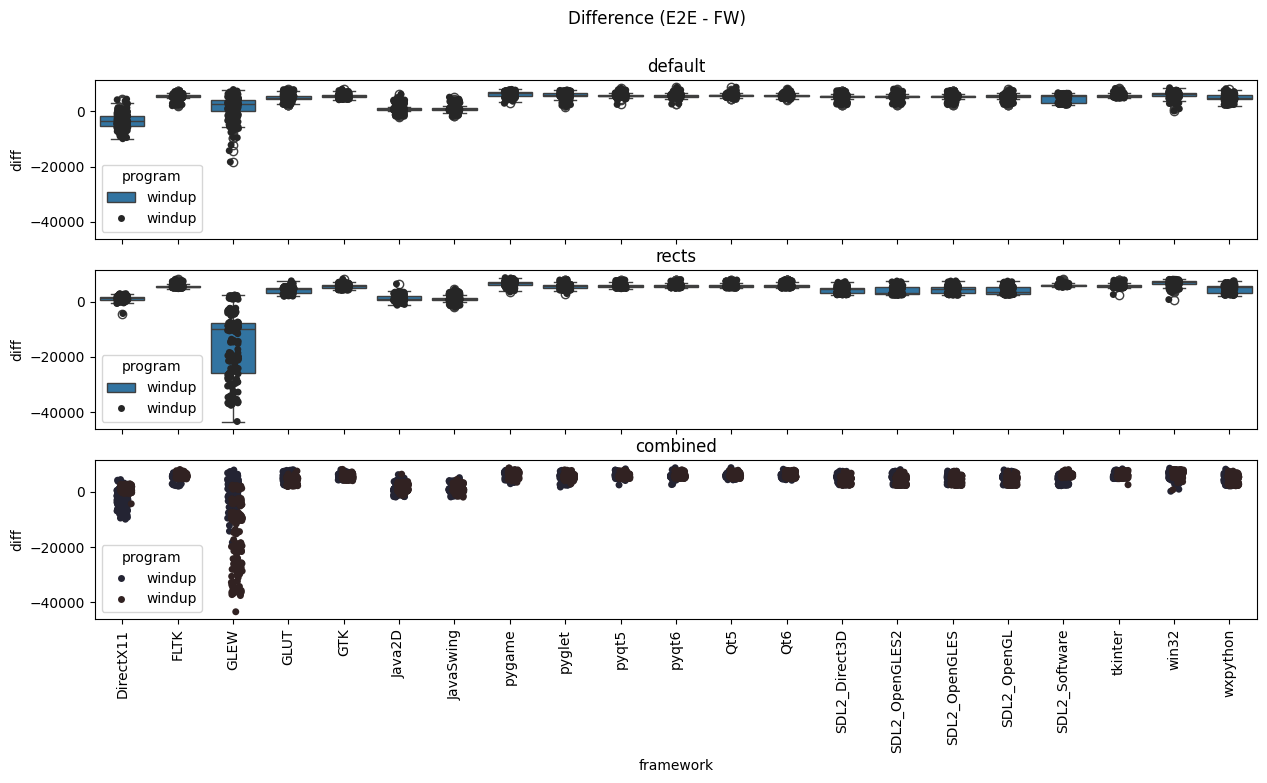

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(15, 7), sharex=True, sharey=True)
fig.suptitle("Difference (E2E - FW)")

sns.boxplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='diff', hue='program', dodge=True)
sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='diff', hue='program', dodge=True, color='black')
axes[0].set_title("default")

sns.boxplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', dodge=True)
sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', dodge=True, color='black')
axes[1].set_title("rects")

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='diff', hue='program', dodge=True, color='blue')
sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', dodge=True, color='red', transform=offset(0.05)+trans)
axes[2].set_title("combined")

agg_mean = round(np.mean(diff_means), 1)
plt.axhline(agg_mean, color='black')

axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
#axes[2].set_ylim(5000, 15000)

# Combined

C:\Users\tina\AppData\Local\Temp\ipykernel_8704\3271999548.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='ete', hue='program', dodge=True, color='black')
C:\Users\tina\AppData\Local\Temp\ipykernel_8704\3271999548.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='fw', hue='program', dodge=True, color='black')
C:\Users\tina\AppData\Local\Temp\ipykernel_8704\3271999548.py:14: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.st

Text(0.5, 1.0, 'diff')

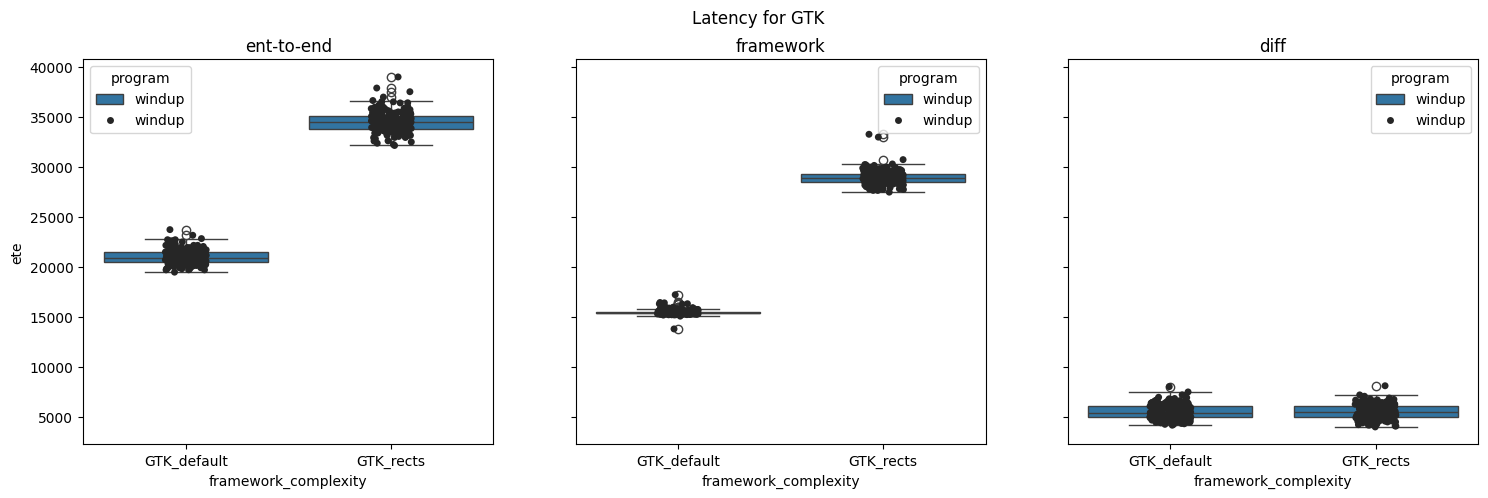

In [15]:
FRAMEWORK = 'GTK'
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
fig.suptitle(f"Latency for {FRAMEWORK}")

sns.boxplot(ax=axes[0], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='ete', hue='program', dodge=True)
sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='ete', hue='program', dodge=True, color='black')
axes[0].set_title("ent-to-end")

sns.boxplot(ax=axes[1], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='fw', hue='program', dodge=True)
sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='fw', hue='program', dodge=True, color='black')
axes[1].set_title("framework")

sns.boxplot(ax=axes[2], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='diff', hue='program', dodge=True)
sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='diff', hue='program', dodge=True, color='black')
axes[2].set_title("diff")

#axes[2].set_ylim(0, 25000)